# Final Project: Methods for Population Growth Projections

## Logistic Growth

Below is the standard logistic growth model, defined as $P(t) = \frac{K N_0 e^{\gamma t}}{K + N_0 (e^{\gamma t} - 1)}$

In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
def log_growth(data, times):
    # Compute dP/dt values
    dN = (data[2:]-data[:-2])/(times[2:]-times[:-2])
    P = dN / data[1:-1]
    
    X = np.asarray([np.ones(times.size - 2), data[1:-1]]).transpose()
    Y = np.asarray(P)
    alpha = np.linalg.lstsq(X,Y)[0]
    gamma = alpha[0]
    K = (-gamma) / alpha[1]
    
    print(gamma, K)

    # Computes from first data year to 2100
    t_estimate = np.arange(times[0], 2100, 1)
    N0=data[0]
    t_model=t_estimate-times[0]
    return K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
    K)*(np.exp(gamma*t_model)-1))

## Modified Lotka-Volterra

In [3]:
gdp_data = pd.read_csv('data/gdp_new.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
gdp_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,1.370000e+12,1.420000e+12,1.530000e+12,1.640000e+12,1.800000e+12,1.960000e+12,2.130000e+12,2.260000e+12,2.440000e+12,2.690000e+12,...,5.790000e+13,6.350000e+13,6.020000e+13,6.600000e+13,7.330000e+13,7.490000e+13,7.700000e+13,7.910000e+13,7.480000e+13,7.590000e+13
United States,5.430000e+11,5.630000e+11,6.050000e+11,6.390000e+11,6.860000e+11,7.440000e+11,8.150000e+11,8.620000e+11,9.430000e+11,1.020000e+12,...,1.450000e+13,1.470000e+13,1.440000e+13,1.500000e+13,1.550000e+13,1.620000e+13,1.670000e+13,1.740000e+13,1.810000e+13,1.860000e+13
South Africa,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,1.235475e+10,1.377712e+10,1.489430e+10,1.678006e+10,...,2.990340e+11,2.871000e+11,2.972170e+11,3.752980e+11,4.168780e+11,3.963330e+11,3.668100e+11,3.511190e+11,3.176110e+11,2.954560e+11


In [4]:
pop_data = pd.read_csv('data/pop_data.csv', index_col=0, header=0, sep=',', skiprows=[], thousands=',')
pop_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,3032160395,3073368588,3126509808,3191786431,3257459749,3324545317,3394783656,3464689184,3535355320,3610178790,...,6683228246,6766302523,6849573246,6932880892,7014998805,7099548883,7185078354,7271228018,7357369754,7444027227
United States,180671000,183691000,186538000,189242000,191889000,194303000,196560000,198712000,200706000,202677000,...,301231207,304093966,306771529,309348193,311663358,313998379,316204908,318563456,320896618,323127513
South Africa,17456855,17920673,18401608,18899275,19412975,19942303,20486439,21045785,21622590,22219897,...,49887181,50412129,50970818,51584663,52263516,52998213,53767396,54539571,55291225,56015473


In [5]:
gdp_real_data = gdp_data.as_matrix()
pop_real_data = pop_data.as_matrix()

print(pop_real_data[0])

[3032160395 3073368588 3126509808 3191786431 3257459749 3324545317
 3394783656 3464689184 3535355320 3610178790 3685753338 3763393041
 3840269676 3916243700 3992871281 4067740570 4140647345 4213305198
 4287155677 4362863940 4439337768 4517802653 4599181618 4681262097
 4763043104 4846338373 4932113628 5020001100 5108813275 5197758288
 5288103216 5375488625 5459753863 5544873088 5628791182 5713794373
 5796632121 5879433899 5961166045 6041818590 6121682741 6201340848
 6280531847 6359901308 6439827446 6520301437 6601480650 6683228246
 6766302523 6849573246 6932880892 7014998805 7099548883 7185078354
 7271228018 7357369754 7444027227]


In [6]:
par_init = [0.003, 5.2, -55e-18, 0.031, -2e-22] # Initial values provided by report
par_est = [0.003, 5.2e-6, -55e-17, 0.036, -2e-22] # Adjustments based on hypothesis

# x0 = [1.15e9, 0.21e12]

def model(t, data, params):   
    a1, a3k1, a2, b1, b2 = params
    
    x0 = [data[0][0], data[1][0]]
    
    def dpdt(x, t):
        return (a1*x[0] + a3k1*x[1] + a2*x[0]*x[1])
    def dgdt(x, t):
        return b1*x[1] + b2*x[0]*x[1]
    def dxdt(x, t):
        return np.array([dpdt(x, t),  dgdt(x, t)])
    
    return integrate.odeint(dxdt, x0, t).T # Transpose to get population and GDP in separate arrays

def score(params, t, data):
    model_data = model(t, data, params)
    
    return np.sum((model_data[0] - data[0])**2 + (model_data[1] - data[1])**2) # Modified L2 norm

The following simulates the model for the world using the estimated parameters, defined above

Optimization terminated successfully.
         Current function value: 2260248693723315007978995712.000000
         Iterations: 329
         Function evaluations: 700
[  3.27245855e-03   4.92042340e-06  -1.15184990e-16   7.61661322e-02
  -3.28650420e-22]
0.0277212063112 12263457577.9


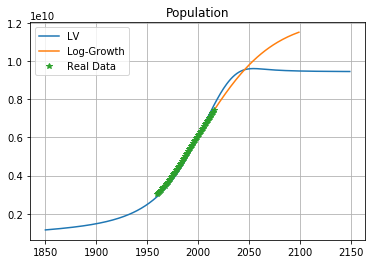

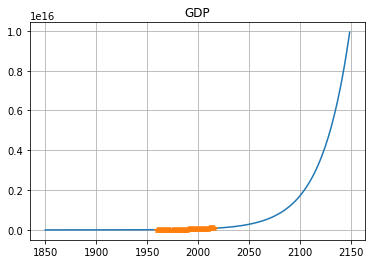

In [7]:
t = np.arange(1960, 2017, 1)

world_pop = pop_real_data[0]
world_gdp = gdp_real_data[0]

data = np.asarray([world_pop, world_gdp])

# This is to show values obtained from this method
# Estimated parameter values are based off of this
result = optimize.fmin(score, x0=par_init, args=(t, data))
print(result)

t_plot = np.arange(1850, 2150, 1)

# Change to paper's data points to align better with it
data = np.asarray([[1.15e9], [0.21e12]])

lr = log_growth(world_pop, np.arange(1960, 2017, 1))

plt.figure()
plt.title("Population")
plt.grid()
# Plot using estimated parameters
# Derived from educated guess from algorithm parameters
plt.plot(t_plot, model(t_plot, data, par_est)[0], label='LV')
plt.plot(np.arange(1960, 2100, 1), lr, label="Log-Growth")
plt.plot(np.arange(1960, 2017, 1), world_pop, '*', label='Real Data')
plt.legend()
plt.show()

plt.figure()
plt.title("GDP")
plt.grid()
# Plot using estimated parameters
# Derived from educated guess from algorithm parameters
plt.plot(t_plot, model(t_plot, data, par_est)[1])
plt.plot(np.arange(1960, 2017, 1), world_gdp, '*')
plt.show()

Simulate all data using least squares. In order, the output are for: the world, U.S., and South Africa.

$\frac{dp}{dt} = \alpha_1 p + \alpha_3 k_1 g + \alpha_2 g p\\ \frac{dg}{dt} = \beta_1 g + \beta_2 p g$

[  2.04363524e-02  -2.15775934e-06   1.79165257e-16   2.30552290e-01
  -2.79077632e-11]
0.0277212063112 12263457577.9


/Users/rossfreeman/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


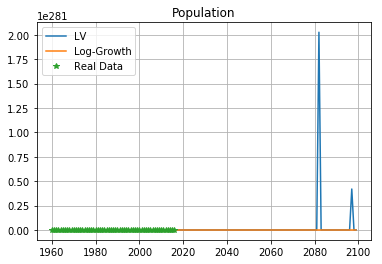

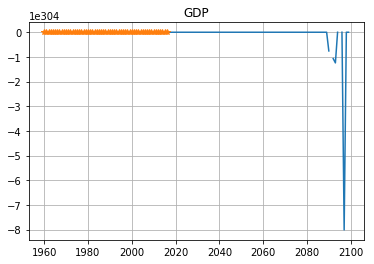

[  1.06801814e-02   2.76608274e-07  -1.04531230e-15   1.80206018e-01
  -4.68960152e-10]
0.0171236771817 632260032.471


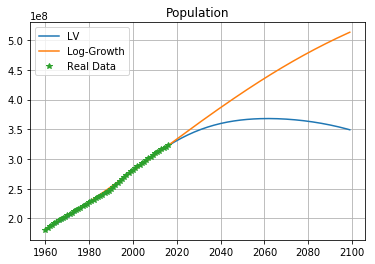

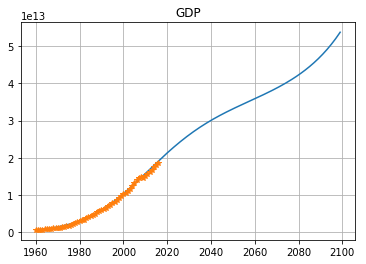

[  2.21904455e-02   2.77303234e-06  -8.31084371e-14   2.90483363e-01
  -5.20885607e-09]
0.0384739458259 79007800.1367


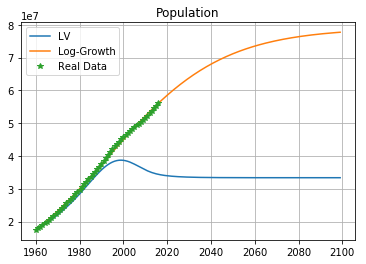

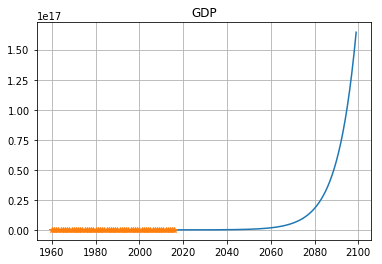

In [8]:
for (idx, country_gdp) in enumerate(gdp_real_data):
    country_pop = pop_real_data[idx]
    data = np.asarray([country_pop, country_gdp])
    
    p = country_pop[1:] # All but first value
    g = country_gdp[1:]
    pg = p * g
    
    Y_pop = np.asarray([t - s for s, t in zip(country_pop, country_pop[1:])]) # Determine dp/dt vals
    X_pop = np.asarray([p, g, pg]).T
    
    Y_gdp = np.asarray([t - s for s, t in zip(country_gdp, country_gdp[1:])]) # Determine dg/dt vals
    X_gdp = np.asarray([g, pg]).T
    
    result_pop = np.linalg.lstsq(X_pop,Y_pop)
    result_gdp = np.linalg.lstsq(X_gdp,Y_gdp)
    result = np.append(result_pop[0], result_gdp[0])
    print(result)
    
    t_plot = np.arange(1960, 2100, 1)
    
    lr = log_growth(country_pop, np.arange(1960, 2017, 1))
    
    plt.figure()
    plt.title("Population")
    plt.grid()
    plt.plot(t_plot, model(t_plot, data, result)[0], label='LV')
    plt.plot(t_plot, lr, label='Log-Growth')
    plt.plot(np.arange(1960, 2017, 1), country_pop, '*', label='Real Data')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.grid()
    plt.title("GDP")
    plt.plot(t_plot, model(t_plot, data, result)[1])
    # plt.plot(np.arange(1960, 2017, 1), res.T[1][110:-133])
    plt.plot(np.arange(1960, 2017, 1), country_gdp, '*')
    plt.plot()
    plt.show()